## 案例：中国家电零售总额与GDP、人均可支配收入、家电广告投放总额、居民消费价格指数等的关系

<center>
    姓名：叶家辉 <br>
    学号：201800830004
</center>

### 一、提出问题

第三章中讨论多元线性回归模型的参数估计时，强调了无多重共线性的假定，即假定各解释变量之间不存在线性关系。或者从数学的意义上说，若存在不全为0的数$\lambda_1,\lambda_2,...,\lambda_k$，使得$\lambda_1 X_{1i}+\lambda_2 X_{2i} +...+ \lambda_k X_{ki} = 0, (i = 1,2,...,n)$，则称解释变量$X_1,X_2,...,X_k$之间存在完全的多重共线性。若存在不全为0的数$\lambda_1,\lambda_2,...,\lambda_k$，使得$\lambda_1 X_{1i}+\lambda_2 X_{2i} +...+ \lambda_k X_{ki} +v_i = 0, (i = 1,2,...,n)$，其中$v_i$是随机变量，则称解释变量$X_1,X_2,...,X_k$是一种近似的多重共线性。

经济问题中常出现无多重共线性假定被违反的情况，而一定程度的多重共线性会对参数估计值的准确性、稳定性带来影响，所以需要对多重共线性进行检测并做出处置。

经济学原理告诉我们，家电零售总额可能与经济发展水平、居民生活水平以及家电的广告投放等因素有关，因此猜想GDP、人均可支配收入、家电广告投放总额、居民消费价格指数等可能是中国家电零售总额的影响因素。为了指导家电行业的进一步发展，就需要更准确地定量分析这些影响。但是这些变量之间可能存在一定的多重共线性，这是就需要对这种多重共线性进行检验和解决。

### 二、模型设定

在之后的模型中，我们令$Y$代表家电零售总额（亿元），$X_2$代表GDP（亿元），$X_3$代表人均可支配收入（元），$X_4$代表家电广告投放总额（亿元），$X_5$代表居民消费价格指数（以1996年为100）。我们首先读入数据，并观察其特点。

      年份       Y        X2       X3      X4     X5
0   1997   506.0   78802.9   5160.3   64.71  102.8
1   1998   651.7   83817.6   5425.1   79.02  102.0
2   1999   724.3   89366.5   5854.0   67.14  100.5
3   2000   831.6   99066.1   6280.0   73.51  101.0
4   2001   784.7  109276.2   6859.6   65.88  101.7
5   2002   953.0  120480.4   7702.8   78.74  100.8
6   2003  1127.2  136576.3   8472.2   88.00  102.1
7   2004  1415.7  161415.4   9421.6   76.51  106.0
8   2005  1636.0  185998.9  10493.0   77.40  107.9
9   2006  1921.7  219028.5  11759.5   88.61  109.6
10  2007  2370.7  270844.0  13785.8   94.40  114.8
11  2008  2706.6  321500.5  15780.8   87.92  121.6
12  2009  3154.4  348498.5  17174.7   98.67  120.7
13  2010  4056.5  411265.2  19109.4  119.43  124.7
14  2011  5374.9  484753.2  21809.8  140.34  131.5
15  2012  5935.8  539116.5  24564.7  205.09  134.9
16  2013  6944.5  590422.4  26955.1  229.73  138.4
17  2014  7603.3  644791.1  29381.0  246.83  141.2
18  2015  8269.5  682635.1  317

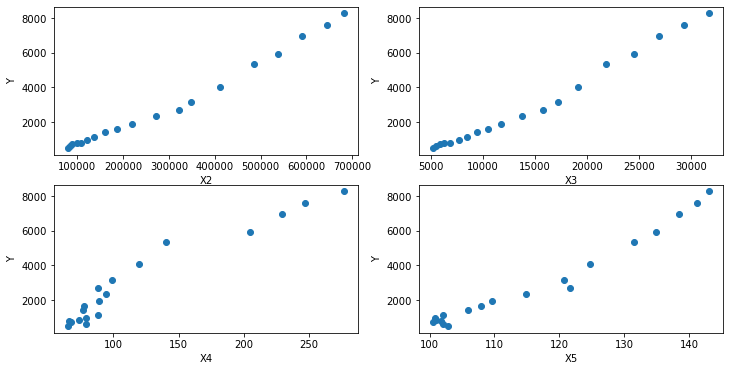

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 将数据读入为DataFrame
df = pd.read_excel('data.xlsx',header=0)
df.rename(columns = {'家电零售总额':'Y','GDP':'X2','人均可支配收入':'X3', '家电广告投放总额':'X4','居民消费价格指数':'X5'},inplace = True)
print(df)

plt.figure(figsize = (12,6))

plt.subplot(2,2,1)
plt.scatter(df['X2'],df['Y'])
plt.xlabel("X2")
plt.ylabel("Y")

plt.subplot(2,2,2)
plt.scatter(df['X3'],df['Y'])
plt.xlabel("X3")
plt.ylabel("Y")

plt.subplot(2,2,3)
plt.scatter(df['X4'],df['Y'])
plt.xlabel("X4")
plt.ylabel("Y")

plt.subplot(2,2,4)
plt.scatter(df['X5'],df['Y'])
plt.xlabel("X5")
plt.ylabel("Y")

plt.show()

可以看出，解释变量$X_2,X_3,X_4,X_5$与被解释变量$Y$都成正相关。我们设定如下形式的模型：

$$Y_t = \beta_1 + \beta_2 X_{2t} + \beta_3 X_{3t} + \beta_4 X_{4t} + \beta_5 X_{5t} + u_i$$

然后用OLS估计模型的参数。

### 三、参数估计

多元线性回归模型的参数估计可参照第三章。具体实现如下：

In [2]:
import statsmodels.formula.api as smf

est1 = smf.ols(formula='Y ~ X2 + X3 + X4 + X5', data=df).fit()

# 打印系数
print(est1.params)
# 打印回归结果
print(est1.summary())

Intercept    3086.576406
X2              0.020875
X3             -0.215372
X4             10.959803
X5            -37.656850
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1512.
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           2.80e-18
Time:                        15:48:46   Log-Likelihood:                -118.06
No. Observations:                  19   AIC:                             246.1
Df Residuals:                      14   BIC:                             250.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

/Users/jafeyye/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


从中我们可以得到

$$ Y = 3086.576406 + 0.020875 * X_2 - 0.215372 * X_3 + 10.959803 * X_4 - 37.656850 * X_5$$

$$ SE = (2915.852)\ \ (0.006)\ \ (0.103)\ \ (1.587)\ \ (29.315) $$

$$ t = (1.059)\ \ (3.562)\ \ (-2.099)\ \ (6.908)\ \ (-1.285) $$

$$ R^2 = 0.998\ \ \ \ \overline{R^2} = 0.997\ \ \ \ F = 1512\ \ \ \ df = 14 $$

### 四、模型检验

#### 4.1 拟合优度检验

可决系数表示的是总变差中由模型做出了解释的部分所占的比重，多重可决系数可表示为

$$R^2 = {\sum{(\hat{Y_i}-\overline{Y})^2}\over{\sum{(Y_i-\overline{Y})^2}}} = 1-{{\sum{e_i^2}}\over \sum{y_i^2}}$$

需要注意的是，多重可决系数是模型中解释变量个数的不减函数，在对比不同模型的多重可决系数时会带来缺陷，所以需要修正。修正的可决系数为：

$$\overline{R^2} = 1-{{\sum{e_i^2}/(n-k)}\over \sum{y_i^2}/(n-1)} = 1 - {{n-1}\over{n-k}}{{\sum{e_i^2}}\over \sum{y_i^2}}$$

从上面的结果可以看出，可决系数$R^2 = 0.998$，修正后的可决系数$\overline{R^2} = 0.997$，说明模型对样本的拟合较好。

#### 4.2 F检验

多元回归由于存在多个解释变量，所以需要说明所有解释变量联合起来对被解释变量影响的总体显著性，或整个方程总的联合显著性。这就需要在方差分析的基础上进行F检验。建立统计量

$$F = {{{ESS/(k-1)}\over{RSS/(n-k)}} ～ F(k-1,n-k)}$$

给定显著性水平$\alpha = 0.05$，在F分布中查出自由度为$k-1=4$，$n-k=14$的临界值$F_{0.05}{(4,14)} = 3.11$。而$F = 1512 > F_{0.05}{(4,14)} = 3.11$，所以应该拒绝原假设$H_0: \beta_2 = \beta_3 = \beta_4 = \beta_5 =0$，说明回归方程显著。

#### 4.3 t检验

除了检验多个解释变量联合起来对被解释变量的显著性，还需要检验各个解释变量独自对被解释变量的显著性，这就需要分别对每个回归系数逐个地进行t检验。由此我们可以发现，在一元回归中F检验与t检验等价，且$F=t^2$，但在多元回归中F检验与t检验作用不同，故需要分别进行。

若给定显著性水平$\alpha = 0.05$，查t分布表可得自由度为$n-k = 14$时临界值$t_{0.025}(14) = 2.1448$；若给定显著性水平$\alpha = 0.10$，查t分布表可得自由度为$n-k = 14$时临界值$t_{0.05}(14) = 1.7613$。

$\beta_2$的t统计量$t=3.562 > t_{0.025}(14) = 2.1448$，表明在$\alpha = 0.05$显著性水平的条件下拒绝原假设；

$\beta_3$的t统计量$｜t｜=2.099 > t_{0.05}(14) = 1.7613$，表明在$\alpha = 0.10$显著性水平的条件下拒绝原假设；

$\beta_4$的t统计量$t=6.908 > t_{0.025}(14) = 2.1448$，表明在$\alpha = 0.05$显著性水平的条件下拒绝原假设；

$\beta_5$的t统计量$｜t｜=1.285 < t_{0.05}(14) = 1.7613$，表明在$\alpha = 0.10$显著性水平的条件下**还不能**拒绝原假设。

#### 4.4 经济意义检验

模型估计出的参数表明：

GDP每增加1亿元，家电零售总额就增加0.020875亿元，符合经济学规律；

人均可支配收入每增加1元，家电零售总额就减少0.215372亿元，人均可支配收入增加，家电销售总额却减少了，这显然与理论分析和实践经验都不相符；

家电广告投放总额每增加1亿元，家电零售总额就增加10.959803亿元，符合经济学规律；

居民消费价格指数每增加1，家电零售总额就减少37.656850亿元，人们消费水平提高了，家电销售总额却下降了，这显然与理论分析和实践经验都不相符。

#### 4.5 总结

无论是从经济意义的角度，还是从个别解释变量的显著性角度来看，这个模型都存在一定的问题。我们猜想可能是因为四个解释变量“GDP”、“人均可支配收入”、“家电广告投放总额”、“居民消费价格指数”之间存在多重共线性，对参数估计值的准确性、稳定性造成了影响。为了证实我们的猜测，首先需要对变量的多重共线性进行检验。

### 五、多重共线性检验

#### 5.1 简单相关系数检验法

简单相关系数检验法是利用解释变量之间的线性相关程度去判断是否存在严重多重共线性的一种简便方法。一般而言，如果每两个解释变量的简单相关系数比较高（例如大于0.8），则可以认为存在较严重的多重共线性。

需要留意的是，高简单相关系数只是多重共线性的充分条件，而非必要条件。

我们先对解释变量之间的相关系数进行计算。

In [3]:
cor = df.iloc[:,2:]
print(cor.corr())

          X2        X3        X4        X5
X2  1.000000  0.998932  0.937585  0.995145
X3  0.998932  1.000000  0.941257  0.991385
X4  0.937585  0.941257  1.000000  0.917290
X5  0.995145  0.991385  0.917290  1.000000


可以发现任意两个变量间的相关系数已经超过了0.9，这可以说明变量间存在很强的多重共线性。

#### 5.2 方差扩大因子法

对于多元线性回归模型来说，如果分别以每个解释变量为被解释变量，做与其他解释变量的回归，这称为**辅助回归**。用$R_j^2$表示以$X_j$为被解释变量做对其他解释变量辅助线性回归的可决系数，则可以证明解释变量$X_j$参数估计值$\hat\beta_j$的方差可表示为

$$Var(\hat{\beta}_j) = {{\sigma^2}\over{\sum{x_j^2}}}{1\over{1-R_j^2}} = {{\sigma^2}\over{\sum{x_j^2}}}VIF_j$$

其中，$VIF_j$是变量$X_j$的方差扩大因子，即

$$VIF_j = {1\over {1-R_j^2}}$$

由于$R_j^2$度量了$X_j$与其他变量的线性相关程度，这种相关程度越强，说明变量间多重共线性越严重，$VIF_j$也就越大。反之，$R_j^2$越小，说明变量间线性相关性越弱，$VIF_j$也就越接近1。由此可见，我们可以用$VIF_j$作为变量间多重共线性严重程度的度量。

经验表明，$VIF_j \geq 10$时，说明解释变量与其余解释变量之间有严重的多重共线性，且这种多重共线性可能会过度地影响最小二乘估计。

下面是计算各个解释变量方差扩大因子的具体方法：

In [4]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.iloc[:,2:]
# 加上常数项
X["c"] = np.ones((len(df)))

for i in range(X.shape[1] - 1):
    print("解释变量X{}的方差扩大因子为{}".format(i+2,round(variance_inflation_factor(X.values,i),2)))

解释变量X2的方差扩大因子为1335.61
解释变量X3的方差扩大因子为723.46
解释变量X4的方差扩大因子为10.49
解释变量X5的方差扩大因子为185.11


从以上结果可以看出，$X_2,X_3,X_4,X_5$的$VIF$均大于10，其中$X_5$的$VIF$比较巨大，$X_2,X_3$的$VIF$特别巨大，这说明存在非常严重的多重共线性。这种多重共线性显然已经对参数估计造成了影响，因此亟需进行处理。

### 六、多重共线性处理

#### 6.1 处理方法

一般来说，剔除变量和变量变换都可能消除一定的多重共线性。经过多次试验，综合考虑多重共线性以及估计后的显著性，最终考虑剔除变量$X_2$。（多次实验后发现，如果此时再进行对数变换，可能会牺牲一部分变量显著性，因此不再进行变量变换。）这时考察新的变量间的多重共线性：

In [5]:
XX = df[['X3','X4','X5']]
XX["c"] = np.ones((len(df)))

print(XX)
for i in range(XX.shape[1] - 1):
    print("解释变量lnX{}的方差扩大因子为{}".format(i+2,round(variance_inflation_factor(XX.values,i),2)))

         X3      X4     X5    c
0    5160.3   64.71  102.8  1.0
1    5425.1   79.02  102.0  1.0
2    5854.0   67.14  100.5  1.0
3    6280.0   73.51  101.0  1.0
4    6859.6   65.88  101.7  1.0
5    7702.8   78.74  100.8  1.0
6    8472.2   88.00  102.1  1.0
7    9421.6   76.51  106.0  1.0
8   10493.0   77.40  107.9  1.0
9   11759.5   88.61  109.6  1.0
10  13785.8   94.40  114.8  1.0
11  15780.8   87.92  121.6  1.0
12  17174.7   98.67  120.7  1.0
13  19109.4  119.43  124.7  1.0
14  21809.8  140.34  131.5  1.0
15  24564.7  205.09  134.9  1.0
16  26955.1  229.73  138.4  1.0
17  29381.0  246.83  141.2  1.0
18  31790.3  277.19  143.1  1.0
解释变量lnX2的方差扩大因子为93.01
解释变量lnX3的方差扩大因子为10.06
解释变量lnX4的方差扩大因子为66.88


/Users/jafeyye/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


可以看出，虽然多重共线性没有被完全消除，但也得到了一定的控制，所以可以建立新的模型：

$$Y_t = \beta_1 + \beta_3 X_{3t} + \beta_4 X_{4t} + \beta_5 X_{5t} + u_i$$

再重新对其进行参数估计与模型检验。

#### 6.2 参数估计

In [6]:
est2 = smf.ols(formula='Y ~ X3 + X4 + X5', data=df).fit()

# 打印系数
print(est2.params)
# 打印回归结果
print(est2.summary())

Intercept   -5592.895565
X3              0.125701
X4             12.106089
X5             45.783701
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           6.88e-18
Time:                        15:48:46   Log-Likelihood:                -124.19
No. Observations:                  19   AIC:                             256.4
Df Residuals:                      15   BIC:                             260.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

/Users/jafeyye/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


从中我们可以得到

$$ Y =-5592.895565 + 0.125701 * X_3 + 12.106089 * X_4 + 45.783701 * X_5$$

$$ SE = (2135.468)\ \ (0.049)\ \ (2.072)\ \ (23.502) $$

$$ t = (-2.619)\ \ (2.562)\ \ (5.842)\ \ (1.948) $$

$$ R^2 = 0.996\ \ \ \ \overline{R^2} = 0.995\ \ \ \ F = 1131\ \ \ \ df = 15 $$

#### 6.3 模型检验

##### 拟合优度检验

可决系数表示的是总变差中由模型做出了解释的部分所占的比重，多重可决系数可表示为

$$R^2 = {\sum{(\hat{Y_i}-\overline{Y})^2}\over{\sum{(Y_i-\overline{Y})^2}}} = 1-{{\sum{e_i^2}}\over \sum{y_i^2}}$$

需要注意的是，多重可决系数是模型中解释变量个数的不减函数，在对比不同模型的多重可决系数时会带来缺陷，所以需要修正。修正的可决系数为：

$$\overline{R^2} = 1-{{\sum{e_i^2}/(n-k)}\over \sum{y_i^2}/(n-1)} = 1 - {{n-1}\over{n-k}}{{\sum{e_i^2}}\over \sum{y_i^2}}$$

从上面的结果可以看出，可决系数$R^2 = 0.996$，修正后的可决系数$\overline{R^2} = 0.995$，说明模型对样本的拟合较好。

##### F检验

多元回归由于存在多个解释变量，所以需要说明所有解释变量联合起来对被解释变量影响的总体显著性，或整个方程总的联合显著性。这就需要在方差分析的基础上进行F检验。建立统计量

$$F = {{{ESS/(k-1)}\over{RSS/(n-k)}} ～ F(k-1,n-k)}$$

给定显著性水平$\alpha = 0.05$，在F分布中查出自由度为$k-1=3$，$n-k=15$的临界值$F_{0.05}{(3,15)} = 3.29$。而$F = 1131 > F_{0.05}{(3,15)} = 3.29$，所以应该拒绝原假设$H_0: \beta_3 = \beta_4 = \beta_5 =0$，说明回归方程显著。

##### t检验

除了检验多个解释变量联合起来对被解释变量的显著性，还需要检验各个解释变量独自对被解释变量的显著性，这就需要分别对每个回归系数逐个地进行t检验。由此我们可以发现，在一元回归中F检验与t检验等价，且$F=t^2$，但在多元回归中F检验与t检验作用不同，故需要分别进行。

若给定显著性水平$\alpha = 0.05$，查t分布表可得自由度为$n-k = 15$时临界值$t_{0.025}(15) = 2.1314$；若给定显著性水平$\alpha = 0.10$，查t分布表可得自由度为$n-k = 15$时临界值$t_{0.05}(15) = 1.7530$。

$\beta_3$的t统计量$t=2.562 > t_{0.025}(15) = 2.1314$，表明在$\alpha = 0.05$显著性水平的条件下拒绝原假设；

$\beta_4$的t统计量$t=5.842 > t_{0.025}(15) = 2.1314$，表明在$\alpha = 0.05$显著性水平的条件下拒绝原假设；

$\beta_5$的t统计量$t_{0.025}(15) = 2.1314 > t=1.948 > t_{0.05}(15) = 1.7530$，表明在$\alpha = 0.10$显著性水平的条件下拒绝原假设。

可以看出，通过调整模型设定，解释变量各自的显著性有了明显提升。

##### 经济意义检验

模型估计出的参数表明：

人均可支配收入每增加1元，家电零售总额就增加0.125701亿元，人均可支配收入的增加会促进家电的销售，符合经济学规律；

家电广告投放总额每增加1亿元，家电零售总额就增加12.106089亿元，广告可大大提高家电知名度，吸引消费者购买，进而提高家电零售总额，符合经济学规律；

居民消费价格指数每增加1，家电零售总额就增加45.783701亿元，人们消费水平提高了，家电销售总额就上升，符合经济学规律。

可以看出，调整后的模型在经济意义上也更加合理。